<a href="https://colab.research.google.com/github/Hevej/Machine-Learning/blob/main/Clasificaci%C3%B3n_Binaria_Manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from collections import deque

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Crear Dataset

In [3]:
#Cantidad de registros
N = 100
Features, Clases = make_blobs(n_samples=N,
                              #Cantidad de clases
                              centers = 2,
                              #Cantidad de features
                              n_features = 2,
                              cluster_std = 0.55,
                              random_state = 0
                              )

In [4]:
Clases.shape

(100,)

In [5]:
Clases = Clases[:,np.newaxis]
Clases.shape

(100, 1)

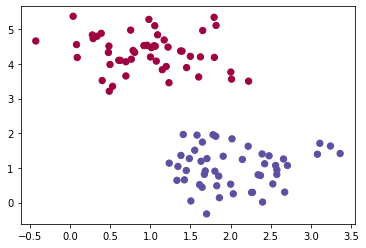

In [6]:
plt.scatter(Features[:,0], Features[:,1], c=Clases[:], s=40, cmap=plt.cm.Spectral)

In [7]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (((df[feature_name] - min_value) / (max_value - min_value))*2)-1
    return result

In [8]:
data_dir = '/content/drive/MyDrive/Dataset_IA/Generos.xlsx'
Dataset = pd.read_excel(data_dir)

In [9]:
DataFeatures = Dataset[['X1','X2']]
DataFeatures = normalize(DataFeatures).to_numpy()
DataClases = Dataset['Y'].to_numpy()[:,np.newaxis]

In [10]:
DataFeatures

array([[ 2.00000000e-01,  1.00000000e+00],
       [ 5.33333333e-01,  9.31034483e-01],
       [ 2.00000000e-01,  7.24137931e-01],
       [-8.66666667e-01,  7.24137931e-01],
       [ 1.00000000e+00,  5.86206897e-01],
       [ 8.00000000e-01,  3.79310345e-01],
       [-4.00000000e-01,  2.41379310e-01],
       [-7.33333333e-01,  1.03448276e-01],
       [ 5.33333333e-01, -3.44827586e-02],
       [-5.33333333e-01, -3.44827586e-02],
       [ 6.00000000e-01, -1.72413793e-01],
       [ 4.66666667e-01, -1.72413793e-01],
       [-4.00000000e-01, -3.10344828e-01],
       [-1.00000000e+00, -4.48275862e-01],
       [ 5.33333333e-01, -5.17241379e-01],
       [ 2.22044605e-16, -5.17241379e-01],
       [ 6.66666667e-02, -5.86206897e-01],
       [-1.00000000e+00, -5.86206897e-01],
       [-2.66666667e-01, -7.24137931e-01],
       [-5.33333333e-01, -7.93103448e-01],
       [-1.33333333e-01, -8.62068966e-01],
       [-1.00000000e+00, -1.00000000e+00]])

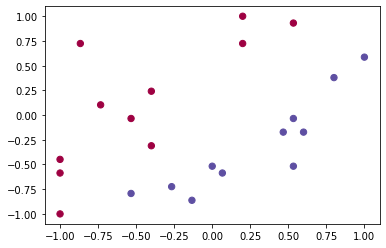

In [11]:
plt.scatter(DataFeatures[:,0], DataFeatures[:,1], c=DataClases[:], s=40, cmap=plt.cm.Spectral)

In [12]:
#Funciones
def tanh(a, derivate=False):
  if derivate:
    return 1-((np.tanh(a))**2)
  else:
    return np.tanh(a)

In [13]:
#Funcion de perdida
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat-y)
  else:
    return np.mean((y_hat - y)**2)

In [14]:
def initializer(layers_dims):
  parameters = {}
  L = len(layers_dims)         
  for l in range(0, L-1):
      parameters['W' + str(l+1)] = (np.random.rand(layers_dims[l], layers_dims[l+1]) * 2) - 1
      parameters['b' + str(l+1)] = (np.random.rand(1, layers_dims[l+1]) * 2) - 1
  return parameters

In [15]:
def train(xData, lr, params, training = True):
  #X sera la activación de entrada
  params['A0'] = xData
  #Forward
  params['Z1'] = np.matmul(params['A0'],params['W1'])+params['b1']
  params['A1'] = tanh(params['Z1'])

  output = params['A1']

  if training:
    #Backpropagation
    #dC/db^L = dC/da^L * da^L/dZ^L * 1 = dC/dZ = δ^L para la ultima capa
    #δ^L
    params['db1'] =  mse(DataClases,output,True)*tanh(params['A1'],True)
    #dC/dW^L = dC/dZ * a^(L-1) = δ^L *  a^(L-1) para la ultima capa
    #δ^L *  a^(L-1)
    params['dW1'] = np.matmul(params['A0'].T,params['db1'])

    #Gradiente descent
    #Actualizar los pesos

    params['W1'] = params['W1'] - params['dW1']* lr
    params['b1'] = params['b1'] - (np.mean(params['db1'],axis=0, keepdims=True))* lr

  return output

In [16]:
layer_dims = [2,1]
params = initializer(layer_dims)

In [17]:
params

{'W1': array([[-0.0126815 ],
        [ 0.90887067]]), 'b1': array([[-0.52616273]])}

In [18]:
errors = deque()

for i in range(50000):
  output = train(DataFeatures,0.01,params)
  errors.append(mse(DataClases,output))
  if errors[-1]<=0.01:
    print("Me sali en la iteración ", i)
    break


Me sali en la iteración  3541


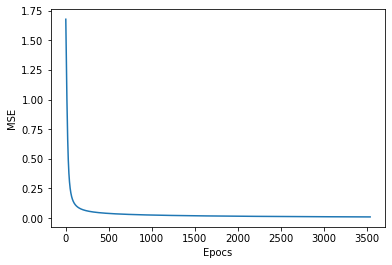

In [19]:
plt.ylabel('MSE')
plt.xlabel('Epocs')
plt.plot(errors)

In [20]:
#Dibujar la linea
xLinea = np.linspace(-1,1, num=100)[:,np.newaxis]
yLinea = -(params['W1'][0]/params['W1'][1])*xLinea.T - (params['b1']/params['W1'][1])
yLineaSup = -(params['W1'][0]/params['W1'][1])*xLinea.T - (params['b1']/params['W1'][1]) + (0.9*params['b1']/params['W1'][1])
yLineaInf = -(params['W1'][0]/params['W1'][1])*xLinea.T - (params['b1']/params['W1'][1]) - (0.9*params['b1']/params['W1'][1])

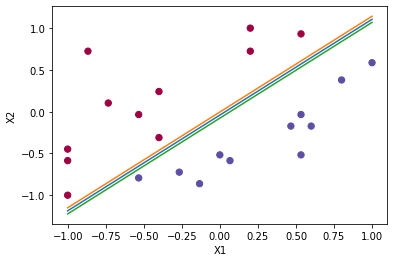

In [21]:
plt.ylabel('X2')
plt.xlabel('X1')
plt.scatter(DataFeatures[:,0], DataFeatures[:,1], c=DataClases[:], s=40, cmap=plt.cm.Spectral)
plt.plot(xLinea,yLinea.T)
plt.plot(xLinea,yLineaSup.T)
plt.plot(xLinea,yLineaInf.T)
plt.show()